<a href="https://colab.research.google.com/github/summer9/DataGroupWork/blob/main/DataAnalysis_Project_PQD_Group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROJECT WORK: SALARY BY JOB TITLE AND COUNTRY

In [ ]:
 #Datasets Link: https://raw.githubusercontent.com/dandev947366/Salary-by-Job-Title-and-Country/main/Salary.csv

### About the dataset:
- Source:  Kaggle, compiled from reputable employment websites and surveys.
- Scope: This dataset collects data from Australia, Canada, China, the US, and the UK. Therefore, it does not represent worldwide-based salary information. We cannot use this data to draw conclusions about salaries worldwide. However, this dataset provides a general view of base salaries.
- Time of dataset collection: Not specified; however, this dataset has been recently updated.
- Why we choose this Dataset?

  We have selected this dataset to discern salary trends based on job titles, aiming to identify the well-paid occupations in the labor market.

- What we want to find out in this dataset:
 + Factors Impacting Salary: Which factors impact on salary?
 + Highest and Lowest Paid Jobs?
 + Salary by Sector:
    + Calculate the average salary for different sectors.
    + Which gender has a higher number, male or female?

- Compatibility with Market Labor Average

    + We will assess whether this database aligns with the average salary trends in the broader labor market for specific sectors.

- Correlation between salary and age, salary and levels of experience.



In [ ]:
# import neccessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 1.Data preprocessing


In [ ]:
# Reading dataset
data = pd.read_csv("https://raw.githubusercontent.com/dandev947366/Salary-by-Job-Title-and-Country/main/Salary.csv", sep=",")


### 1.1 Understand the dataset
-  Rows & columns:  6684 rows x 9 columns
-  Data information
-  Data types

In [ ]:
# Find rows and columns
num_of_rows = len(data)
num_of_cols = data.shape[1]
print(f"The number of columns is {num_of_cols}")
print(f"The number of rows is {num_of_rows}")

The number of columns is 9
The number of rows is 6684


In [ ]:
# Print dataframe
df = pd.DataFrame(data)
print(df)

       Age  Gender  Education Level              Job Title  \
0     32.0    Male                1      Software Engineer   
1     28.0  Female                2           Data Analyst   
2     45.0    Male                3                Manager   
3     36.0  Female                1        Sales Associate   
4     52.0    Male                2               Director   
...    ...     ...              ...                    ...   
6679  49.0  Female                3  Director of Marketing   
6680  32.0    Male                0        Sales Associate   
6681  30.0  Female                1      Financial Manager   
6682  46.0    Male                2      Marketing Manager   
6683  26.0  Female                0        Sales Executive   

      Years of Experience    Salary    Country        Race  Senior  
0                     5.0   90000.0         UK       White       0  
1                     3.0   65000.0        USA    Hispanic       0  
2                    15.0  150000.0     Canada  

In [ ]:
# Info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6684 non-null   float64
 1   Gender               6684 non-null   object 
 2   Education Level      6684 non-null   int64  
 3   Job Title            6684 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   float64
 6   Country              6684 non-null   object 
 7   Race                 6684 non-null   object 
 8   Senior               6684 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 470.1+ KB


In [ ]:
# Data types
data_types = data.dtypes

print(data_types)

Age                    float64
Gender                  object
Education Level          int64
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
Senior                   int64
dtype: object


### 1.2 Missing values

In [ ]:
## count missing value
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
Senior                 0
dtype: int64

In [ ]:
# removing missing values
df = df.dropna()

In [ ]:
# Strip 0 after age, year of experience : making age, experience dtype from float64 to int64
df = df.astype({"Age":'int64', "Years of Experience":'int64'})

### 1.3 Identify and drop duplicate values:
- Duplicate: ??? rows
- Delete duplicate values.
- Final dataset: 5148 rows x 9 columns

In [ ]:
# Count the number of duplicate rows
num_duplicates = data.duplicated().sum()
print(f"Number of Duplicate Rows: {num_duplicates}")

Number of Duplicate Rows: 1536


In [ ]:
# Checking duplicate values and delete them

df = df.drop_duplicates()

### Reset the dataset

In [ ]:
# reset index after dropping some rows
df = df.reset_index(drop=True)

print(df)

      Age  Gender  Education Level              Job Title  \
0      32    Male                1      Software Engineer   
1      28  Female                2           Data Analyst   
2      45    Male                3                Manager   
3      36  Female                1        Sales Associate   
4      52    Male                2               Director   
...   ...     ...              ...                    ...   
5143   37    Male                1   Sales Representative   
5144   49  Female                3  Director of Marketing   
5145   32    Male                0        Sales Associate   
5146   30  Female                1      Financial Manager   
5147   46    Male                2      Marketing Manager   

      Years of Experience    Salary    Country        Race  Senior  
0                       5   90000.0         UK       White       0  
1                       3   65000.0        USA    Hispanic       0  
2                      15  150000.0     Canada       White  

In [ ]:
# numbers of rows and columns after cleaning dataset
print(f"The number of columns is {len(df)}")
print(f"The number of rows is {df.shape[1]}")

The number of columns is 5148
The number of rows is 9


### 1.4 Outliers:
#### Find outliner from columns with numberic attributes using boxplot

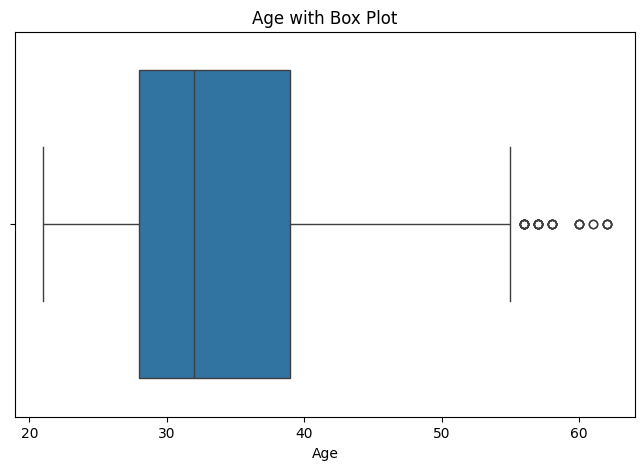

In [ ]:
# Make Outliers for Age column
# create graph to check Age outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Age']);
plt.title('Age with Box Plot')
plt.show()

In [ ]:
#Count the outliers of age
count=df['Age'][df['Age'] > 53].value_counts()
print(count)

Age
54    51
55    15
56    10
57     9
58     7
62     5
60     5
61     2
Name: count, dtype: int64


#### Observe:
 - Age of working in reality can be > 53. The working-age population consists of all persons aged between 15 and 74 years.So outlier are accepted.
- Statistic from https://www.stat.fi/meta/kas/tyoikain_vaesto_en.html#:~:text=The%20working%2Dage%20population%20consists,between%2015%20and%2074%20years.

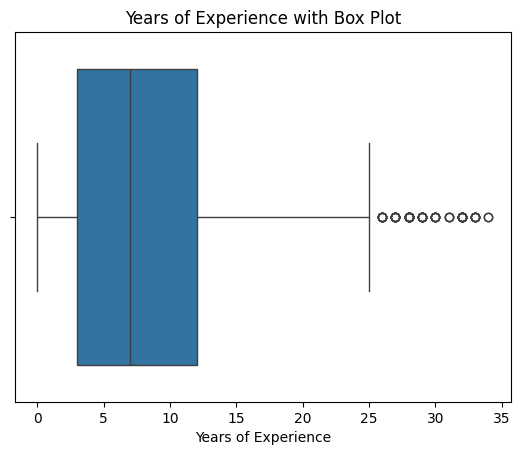

In [ ]:
# Make Outliers for Years of Experience column
# create graph to check Years of Experience outliers
sns.boxplot(x=df['Years of Experience']);
plt.title('Years of Experience with Box Plot')
plt.show()

#### Observe:
  The number of years of work experience in reality can exceed 23, and can be explained similarly to an age of working.

In [ ]:
#Count the outliers Experience's year
count=df['Years of Experience'][df['Years of Experience'] > 25].value_counts()
print(count)

Years of Experience
28    15
32    10
27     9
29     8
26     7
30     6
33     6
31     3
34     2
Name: count, dtype: int64


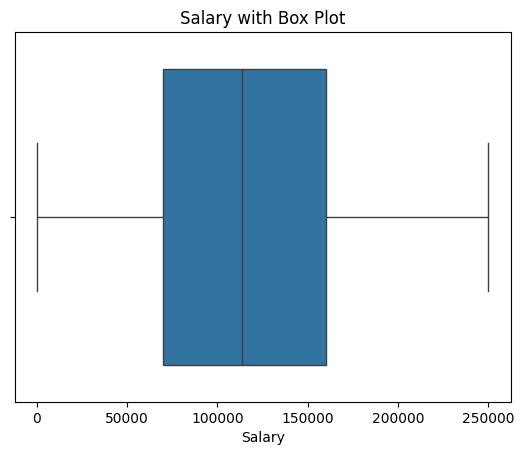

In [ ]:
# Make Outliers for Salary column
# create graph to check Salary outliers
sns.boxplot(x=df['Salary']);
plt.title('Salary with Box Plot')
plt.show()

> There is no outliers from Salary columns when using box plot


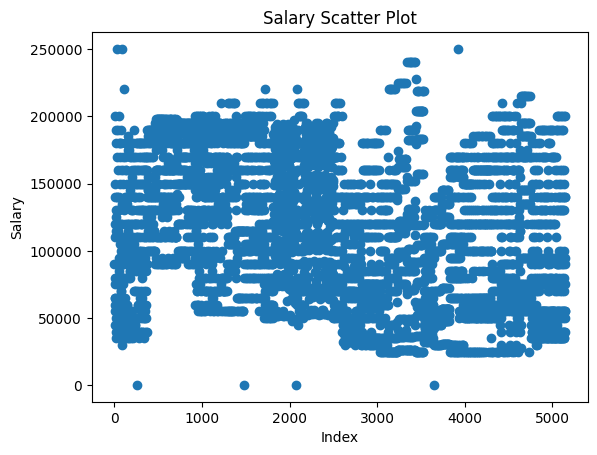

In [ ]:
# Create a scatter plot
plt.scatter(range(len(df['Salary'])), df['Salary'])
plt.title('Salary Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Salary')
plt.show()

#### Observe:
  When using a scatter plot, we noticed some outliers in salary. We chose to ignore them since they have no effect on salary. These outliers could be explained by typos or even exceptional circumstances where employees choose to receive less salary due to the company's performance

In [ ]:
# We can see outlier from top 5 min salary
# Get the top 5 lowest salaries
top_5_lowest_salaries = df.nsmallest(5, 'Salary')
# Print the result
print(top_5_lowest_salaries.head(5))


      Age  Gender  Education Level                    Job Title  \
257    29    Male                1  Business Operations Analyst   
3645   31  Female                1               HR Coordinator   
1480   25  Female                1          Front end Developer   
2074   23    Male                3    Software Engineer Manager   
3026   22    Male                0              Sales Associate   

      Years of Experience   Salary Country              Race  Senior  
257                     1    350.0     USA          Hispanic       0  
3645                    4    500.0     USA             Asian       0  
1480                    1    550.0      UK             Mixed       0  
2074                    1    579.0      UK             Mixed       0  
3026                    1  25000.0     USA  African American       0  


### 1.5 Bins
- Bins are created according to Age group

In [ ]:
# Make Bins and Lables
age_bins = [20, 30, 40, 50, 60, 70]
age_labels = ['20-30', '30-40', '40-50','50-60','60-70']

# Bin Age value
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

print(df)

      Age  Gender  Education Level              Job Title  \
0      32    Male                1      Software Engineer   
1      28  Female                2           Data Analyst   
2      45    Male                3                Manager   
3      36  Female                1        Sales Associate   
4      52    Male                2               Director   
...   ...     ...              ...                    ...   
5143   37    Male                1   Sales Representative   
5144   49  Female                3  Director of Marketing   
5145   32    Male                0        Sales Associate   
5146   30  Female                1      Financial Manager   
5147   46    Male                2      Marketing Manager   

      Years of Experience    Salary    Country        Race  Senior Age Group  
0                       5   90000.0         UK       White       0     30-40  
1                       3   65000.0        USA    Hispanic       0     20-30  
2                      15  150

## 2.Data Objects & Attribute Types
  - Print out columns name that represent nominal attribute, binary attributes, ordinal attributes and numberic attributes

In [ ]:
# Nominal Attributes
print("Columns with nominal attributes:")
for col_name in df[['Gender','Job Title','Country','Race']].columns:
    print(col_name)
dfna=df[['Gender','Job Title','Country','Race']]
print(dfna.head(5))

Columns with nominal attributes:
Gender
Job Title
Country
Race
   Gender          Job Title Country      Race
0    Male  Software Engineer      UK     White
1  Female       Data Analyst     USA  Hispanic
2    Male            Manager  Canada     White
3  Female    Sales Associate     USA  Hispanic
4    Male           Director     USA     Asian


In [ ]:
# Binary Attributes
print("Column with binary attributes: Senior")
print("Count column Senior values: ")
print(df['Senior'].value_counts())

Column with binary attributes: Senior
Count column Senior values: 
Senior
0    4323
1     825
Name: count, dtype: int64


In [ ]:
# Ordinal Attributes
print("Column with ordinal attributes: Education Level")
print(df['Education Level'].value_counts())

Column with ordinal attributes: Education Level
Education Level
1    2254
2    1481
3    1077
0     336
Name: count, dtype: int64


Education Level:

0 : High School

1 : Bachelor Degree

2 : Master Degree

3 : Phd

In [ ]:
#Numberic Attribute
print("Column with numberic attributes:")
for col_name in df[['Years of Experience','Salary','Age']].columns:
    print(col_name)
print(df[['Years of Experience','Salary','Age']].head(5))

Column with numberic attributes:
Years of Experience
Salary
Age
   Years of Experience    Salary  Age
0                    5   90000.0   32
1                    3   65000.0   28
2                   15  150000.0   45
3                    7   60000.0   36
4                   20  200000.0   52


## 3.Making new dataset for sectors: IT, Marketing, and Finance

#### 3.1 IT sector

In [ ]:
# List of job titles belonging to the IT Sector
it_sector_jobs = [
        "Back end Developer",
        "Front End Developer",
        "Full Stack Engineer",
        "Data Analyst",
        "Data Engineer",
        "Data Entry Clerk",
        "Data Scientist",
        "Developer",
        "IT Consultant",
        "IT Manager",
        "IT Project Manager",
        "IT Support",
        "IT Support Specialist",
        "Network Engineer",
        "Software Architect",
        "Software Developer",
        "Software Engineer",
        "Software Engineer Manager",
        "Software Manager",
        "Software Project Manager",
        "Technical Recruiter",
        "Technical Support Specialist",
        "Technical Writer",
        "UX Designer",
        "UX Researcher",
        "Web Designer",
        "Web Developer"
]

# Filter data for the 'IT Sector' based on job titles
it_data = df[df['Job Title'].isin(it_sector_jobs)]
dfIT=pd.DataFrame(it_data)

In [ ]:
print(dfIT.head(5))

    Age  Gender  Education Level           Job Title  Years of Experience  \
0    32    Male                1   Software Engineer                    5   
1    28  Female                2        Data Analyst                    3   
10   29    Male                2  Software Developer                    3   
18   25  Female                1    Data Entry Clerk                    0   
22   30    Male                1          IT Support                    2   

     Salary Country      Race  Senior Age Group  
0   90000.0      UK     White       0     30-40  
1   65000.0     USA  Hispanic       0     20-30  
10  75000.0      UK     Welsh       0     20-30  
18  35000.0      UK     Asian       0     20-30  
22  50000.0      UK     Asian       0     30-40  


#### 3.2 Marketing

In [ ]:
# List of job titles belonging to the Marketing Sector
mkt_sector_jobs = [
        "Marketing Sector,"
        "Advertising Coordinator",
        "Content Marketing Manager",
        "Copywriter",
        "Digital Content Producer",
        "Digital Marketing Manager",
        "Digital Marketing Specialist",
        "Marketing Analyst",
        "Marketing Coordinator",
        "Marketing Director",
        "Marketing Manager",
        "Marketing Specialist",
        "Public Relations Manager",
        "Social Media Manager",
        "Social Media Specialist"
]

# Filter data for the 'IT Sector' based on job titles
mkt_data = df[df['Job Title'].isin(mkt_sector_jobs)]
dfmkt=pd.DataFrame(mkt_data)

In [ ]:
print(dfmkt.head(5))

    Age  Gender  Education Level                Job Title  \
5    29    Male                1        Marketing Analyst   
8    26  Female                1    Marketing Coordinator   
16   33  Female                2        Marketing Manager   
25   28  Female                1  Social Media Specialist   
33   39  Female                1     Marketing Specialist   

    Years of Experience   Salary Country      Race  Senior Age Group  
5                     2  55000.0     USA  Hispanic       0     20-30  
8                     1  45000.0   China   Chinese       0     20-30  
16                    7  90000.0     USA     Asian       0     30-40  
25                    3  45000.0  Canada     White       0     20-30  
33                   10  65000.0  Canada     White       0     30-40  


#### 3.3 Finance

In [ ]:
# Finance Sector
finance_sector_jobs = [
        "Accountant",
        "Financial Advisor",
        "Financial Analyst",
        "Financial Manager",
        "VP of Finance"
]

# Filter data for the 'IT Sector' based on job titles
finance_data = df[df['Job Title'].isin(finance_sector_jobs)]
dfFina=pd.DataFrame(finance_data)

In [ ]:
print(dfFina.head(5))

    Age  Gender  Education Level          Job Title  Years of Experience  \
12   35    Male                1  Financial Analyst                    6   
24   41    Male                2  Financial Manager                   13   
31   31  Female                1         Accountant                    4   
53   47    Male                2      VP of Finance                   19   
64   26    Male                1         Accountant                    1   

      Salary    Country              Race  Senior Age Group  
12   65000.0      China            Korean       0     30-40  
24  140000.0        USA  African American       0     40-50  
31   55000.0         UK             White       0     30-40  
53  200000.0  Australia             Asian       0     40-50  
64   35000.0  Australia        Australian       0     20-30  


## 4.Statistics and Visualization

### 4.1 Compatibility with Market Labor Average.
 - Calculate Average salary, top 5 highest, lowest salary of the dataset.

> Average salary for each job.

In [ ]:
#Averagehttps://colab.research.google.com/drive/1pEEwDuRyAO7dA4YpF4JFc5vDNwO7bn34#scrollTo=4_3_Distributions_about_Age_Year_of_experience_and_Salary_for_IT_Sector salary of each job using mean
AvgSalary = df.groupby('Job Title', sort=False)['Salary'].mean().reset_index()
AvgSalary.rename({"Salary": "AvgSalary"},axis=1, inplace=True)
print("Average salary of each job from the dataset")
AvgSalary['AvgSalary'] = AvgSalary['AvgSalary'].round(2)
print(AvgSalary)

Average salary of each job from the dataset
                        Job Title  AvgSalary
0               Software Engineer  122312.95
1                    Data Analyst  119470.36
2                         Manager  160000.00
3                 Sales Associate   31005.95
4                        Director  200000.00
..                            ...        ...
124        Juniour HR Coordinator   32000.00
125  Digital Marketing Specialist   63461.54
126                  Receptionist   25000.00
127              Social Media Man  100000.00
128               Delivery Driver   28000.00

[129 rows x 2 columns]


In [ ]:
#Average salary of Software Engineer
print("Average salary of Software Engineer")
AvgSalary.loc[AvgSalary['Job Title']=="Software Engineer"]
#The average Sales Associate base salary in US fall between USD 113K - USD 174K (glassdor.com)

Average salary of Software Engineer


,Job Title,AvgSalary
0,Software Engineer,122312.95


In [ ]:
#Average salary of Data Scientist
print("Average salary of Data Scientist")
AvgSalary.loc[AvgSalary['Job Title']=="Data Scientist"]
#The average Sales Associate base salary in US fall between USD 130K - USD 190K (glassdor.com)

Average salary of Data Scientist


,Job Title,AvgSalary
32,Data Scientist,163475.81


In [ ]:
#Average salary of Marketing Manager
print("Average salary of Marketing Manager")
AvgSalary.loc[AvgSalary['Job Title']=="Marketing Manager"]
#The average Marketing Director base salary in US fall between USD 74K - USD 127K (glassdor.com)

Average salary of Marketing Manager


,Job Title,AvgSalary
16,Marketing Manager,108566.8


In [ ]:
#Average salary of Financial Manager
print("Average salary of Financial Manager")
AvgSalary.loc[AvgSalary['Job Title']=="Financial Manager"]
#The average Financial Manager base salary in US fall between USD 110K - USD 183K (glassdor.com)

Average salary of Financial Manager


,Job Title,AvgSalary
24,Financial Manager,130490.2


> Top 5 jobs highest salary

In [ ]:
# Get the top 5 highest salaries
top_5_highest_salaries = df.nlargest(5, 'Salary')
# Print the result
print(top_5_highest_salaries.head(5))

      Age Gender  Education Level                 Job Title  \
30     50   Male                1                       CEO   
83     52   Male                3  Chief Technology Officer   
3926   45   Male                1         Financial Manager   
3342   51   Male                3            Data Scientist   
3357   51   Male                3            Data Scientist   

      Years of Experience    Salary Country   Race  Senior Age Group  
30                     25  250000.0  Canada  Asian       0     50-60  
83                     24  250000.0  Canada  Black       0     50-60  
3926                   21  250000.0  Canada  Black       0     40-50  
3342                   24  240000.0  Canada  Black       0     50-60  
3357                   24  240000.0      UK  Welsh       0     50-60  


In [ ]:
# Get the top 7 lowest salaries
top_7_lowest_salaries = df.nsmallest(7, 'Salary')
# Print the result
print(top_7_lowest_salaries.head(7))

      Age  Gender  Education Level                    Job Title  \
257    29    Male                1  Business Operations Analyst   
3645   31  Female                1               HR Coordinator   
1480   25  Female                1          Front end Developer   
2074   23    Male                3    Software Engineer Manager   
3026   22    Male                0              Sales Associate   
3038   29  Female                0              Sales Associate   
3052   29  Female                0              Sales Associate   

      Years of Experience   Salary    Country              Race  Senior  \
257                     1    350.0        USA          Hispanic       0   
3645                    4    500.0        USA             Asian       0   
1480                    1    550.0         UK             Mixed       0   
2074                    1    579.0         UK             Mixed       0   
3026                    1  25000.0        USA  African American       0   
3038         

### 4.2  Distributions about Age, Year of experience and Salary of the whole Dataset.


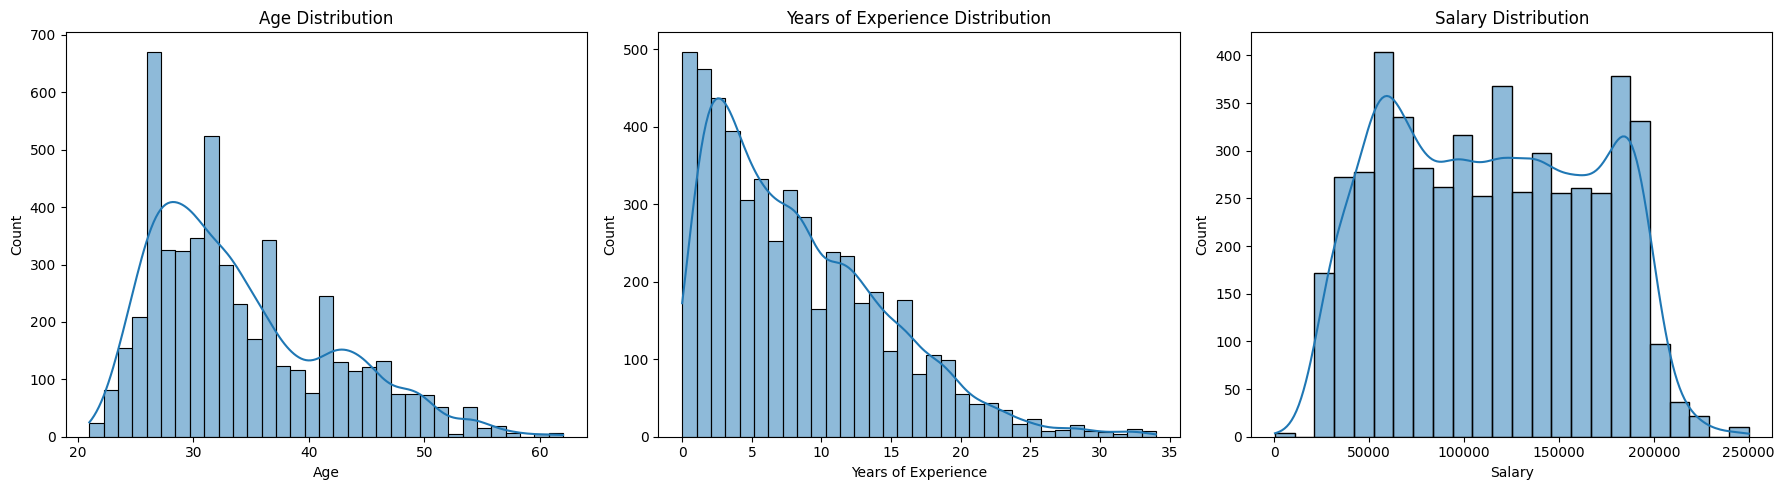

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plotting the first histogram
sns.histplot(df["Age"], kde=True, ax=axs[0])
axs[0].set_title("Age Distribution")

# Plotting the second histogram
sns.histplot(df["Years of Experience"], kde=True, ax=axs[1])
axs[1].set_title("Years of Experience Distribution")

# Plotting the third histogram
sns.histplot(df["Salary"], kde=True, ax=axs[2])
axs[2].set_title("Salary Distribution")

plt.tight_layout()
plt.show()


> We can observe from the histograms:

- The age distribution of this dataset is concentrated around 30.
- Years of experience are mostly from 0 - 5 years.
- Regarding salary salaries vary based on job title, years of experience, and level of education. Using the average salary for this dataset is not advisable due to these dependency factors. Let's categorize job titles according to industry by creating new datasets.

### 4.3  Distributions about Age, Year of experience and Salary for IT Sector


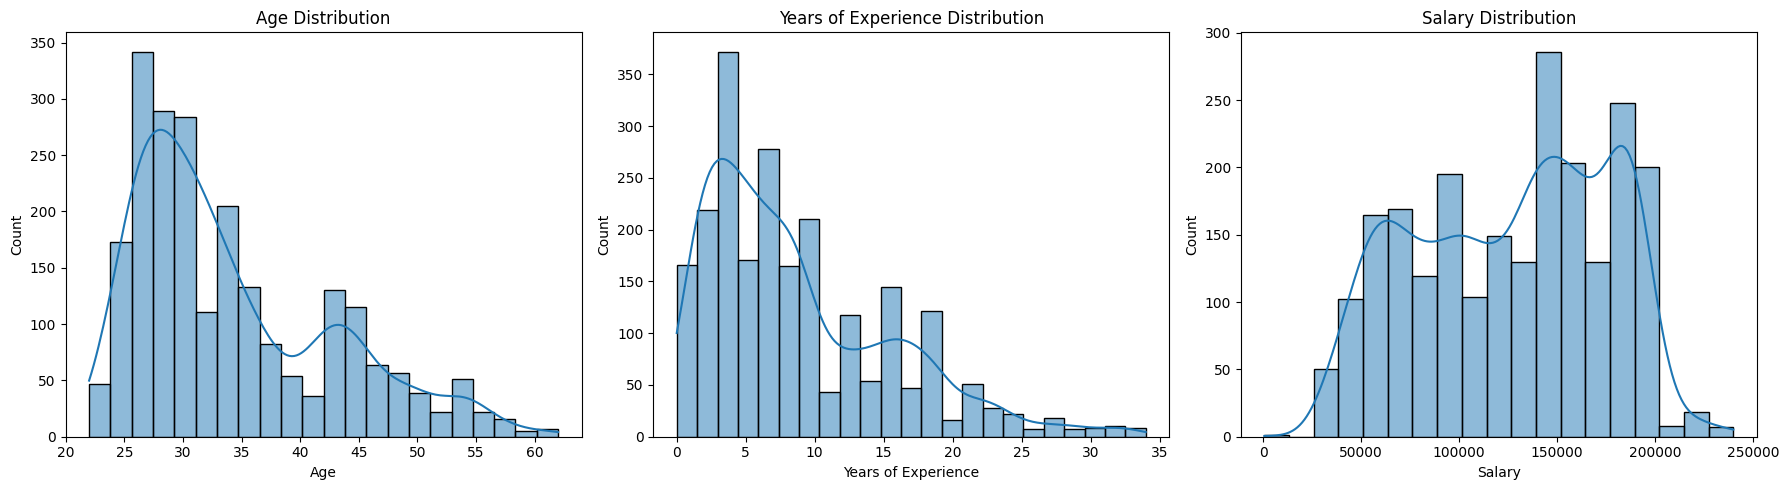

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plotting the first histogram
sns.histplot(dfIT["Age"], kde=True, ax=axs[0])
axs[0].set_title("Age Distribution")

# Plotting the second histogram
sns.histplot(dfIT["Years of Experience"], kde=True, ax=axs[1])
axs[1].set_title("Years of Experience Distribution")

# Plotting the third histogram
sns.histplot(dfIT["Salary"], kde=True, ax=axs[2])
axs[2].set_title("Salary Distribution")

plt.tight_layout()
plt.show()


### 4.4 Distributions about Age, Year of experience and Salary for Marketing Sector

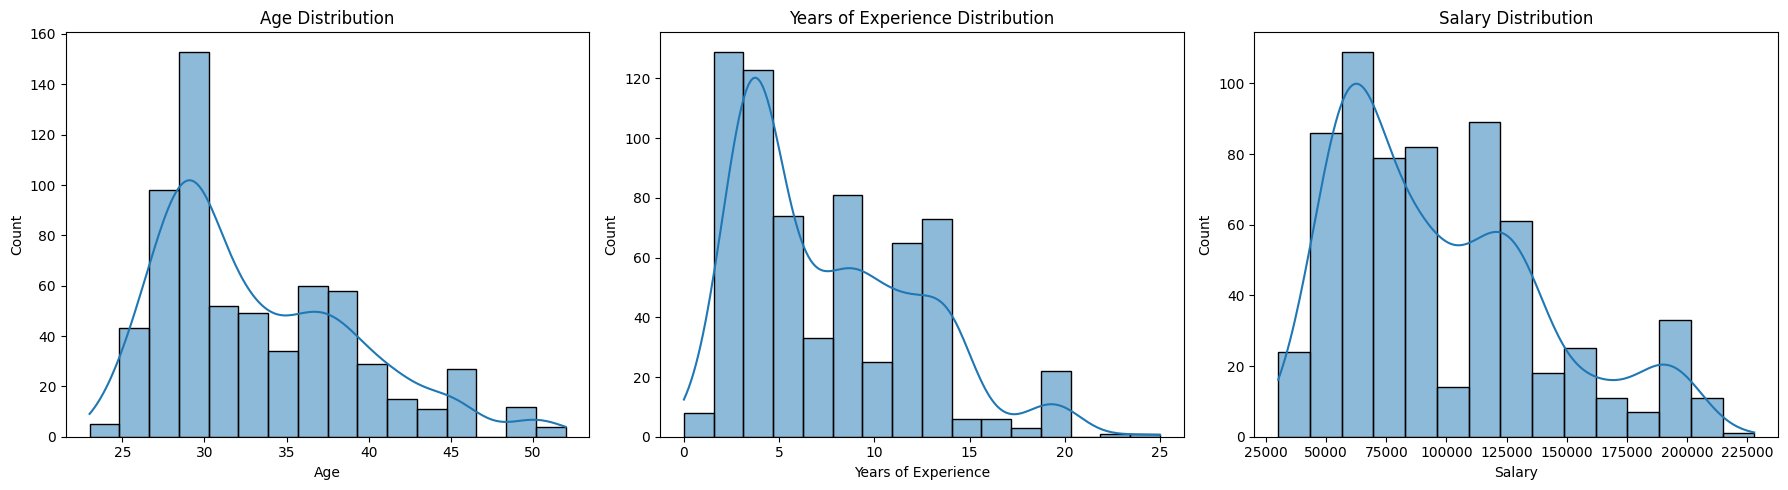

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plotting the first histogram
sns.histplot(dfmkt["Age"], kde=True, ax=axs[0])
axs[0].set_title("Age Distribution")

# Plotting the second histogram
sns.histplot(dfmkt["Years of Experience"], kde=True, ax=axs[1])
axs[1].set_title("Years of Experience Distribution")

# Plotting the third histogram
sns.histplot(dfmkt["Salary"], kde=True, ax=axs[2])
axs[2].set_title("Salary Distribution")

plt.tight_layout()
plt.show()

### 4.5 Distributions about Age, Year of experience and Salary for Finance Sector

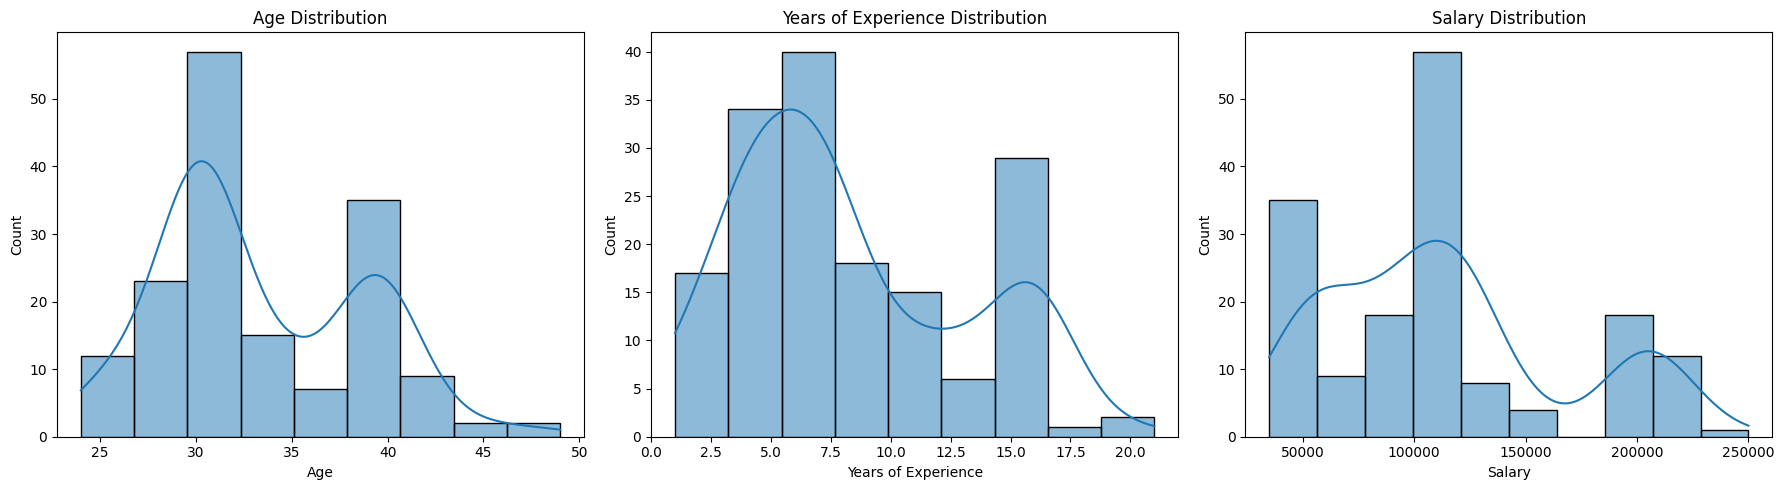

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plotting the first histogram
sns.histplot(dfFina["Age"], kde=True, ax=axs[0])
axs[0].set_title("Age Distribution")

# Plotting the second histogram
sns.histplot(dfFina["Years of Experience"], kde=True, ax=axs[1])
axs[1].set_title("Years of Experience Distribution")

# Plotting the third histogram
sns.histplot(dfFina["Salary"], kde=True, ax=axs[2])
axs[2].set_title("Salary Distribution")

plt.tight_layout()
plt.show()

### 4.6 Compare salary within 3 sectors

> Find average salary of 3 Sectors

In [ ]:
#Find average salary of IT
avesalaryIT = np.mean(dfIT['Salary'])
rounded_avesalaryIT = round(avesalaryIT, 2)
print("Average salary of IT:")
print (rounded_avesalaryIT)

#Find average salary of Marketing
avesalaryMKT = np.mean(dfmkt['Salary'])
rounded_avesalaryMKT = round(avesalaryMKT, 2)
print("Average salary of Marketing:")
print (rounded_avesalaryMKT)

#Find average salary of Finance
avesalaryFI = np.mean(dfFina['Salary'])
rounded_avesalaryFI = round(avesalaryFI, 2)
print("Average salary of Finance:")
print (rounded_avesalaryFI)


Average salary of IT:
126652.45
Average salary of Marketing:
97581.54
Average salary of Finance:
114135.8


> Find median of 3 Sectors

In [ ]:
## Find median salary of IT
mediansalaryIT = np.median(dfIT['Salary'])
print("Median salary of IT:")
print (mediansalaryIT)

## Find median salary of Marketing
mediansalaryMarketing = np.median(dfmkt['Salary'])
print("Median salary of Marketing:")
print (mediansalaryMarketing)

## Find median salary of Finance
mediansalaryFinance = np.median(dfFina['Salary'])
print("Median salary of Finance:")
print (mediansalaryFinance)


Median salary of IT:
134918.5
Median salary of Marketing:
90000.0
Median salary of Finance:
100000.0


### Observe:
  Distribution of salary of 3 Sector is skewed distribution -right skewed and very fluctuate which is affected by some extreme values. So we choose median to compare  instead of average values.

#### 4.6.1 Use Median to compare salary of 3 Sectors

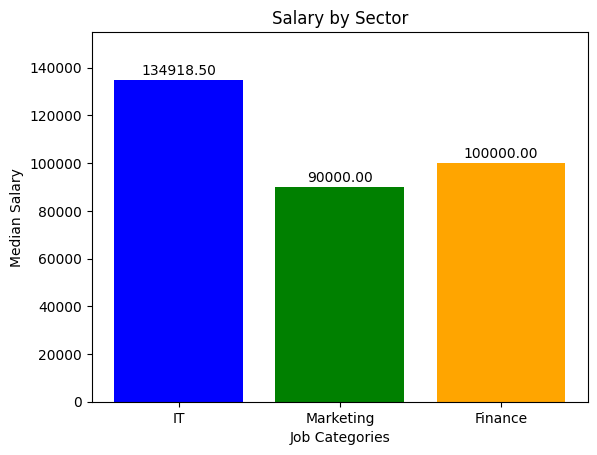

In [ ]:
categories = ['IT', 'Marketing', 'Finance']
compareSalary = [mediansalaryIT, mediansalaryMarketing, mediansalaryFinance]

# Create a bar chart
plt.bar(categories, compareSalary, color=['blue', 'green', 'orange'])
plt.xlabel('Job Categories')
plt.ylabel('Median Salary')
plt.title('Salary by Sector')
plt.ylim(0, max(compareSalary) + 20000)  # Set y-axis limit for better visualization

# Display the values on top of the bars
for i, value in enumerate(compareSalary):
    plt.text(i, value + 1000, f'{value:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()

#### 4.6.2 Mode:
  What is the most popular job title in each dataset? Additionally, what is the tendency regarding hiring people based on the salary in each sector?

In [ ]:
from scipy import stats

## SALARY
# Calculate the mode of the salary of IT
modesalaryIT = stats.mode(dfIT['Salary'])
# Access the mode value(s)
mode_values = modesalaryIT.mode
print("Mode salary(s) of IT:")
print(mode_values)

## Calculate the mode of the salary of MKT
modesalaryMKT = stats.mode(dfmkt['Salary'])
# Access the mode value(s)
mode_values = modesalaryMKT.mode
print("Mode salary(s) of Marketing:")
print(mode_values)

##Calculate the mode of the salary Finance
modesalaryFinance = stats.mode(dfFina['Salary'])
# Access the mode value(s)
mode_values = modesalaryFinance.mode
print("Mode salary(s) of Finance:")
print(mode_values)

Mode salary(s) of IT:
140000.0
Mode salary(s) of Marketing:
65000.0
Mode salary(s) of Finance:
120000.0


In [ ]:
job_title_counts = dfIT['Job Title'].value_counts()
print(job_title_counts)

Job Title
Software Engineer               590
Data Scientist                  372
Software Engineer Manager       313
Full Stack Engineer             259
Data Analyst                    253
Back end Developer              201
Software Developer              139
Web Developer                   114
Front End Developer              16
UX Designer                       5
Data Engineer                     4
IT Consultant                     2
IT Support Specialist             2
IT Project Manager                1
Data Entry Clerk                  1
IT Support                        1
Software Manager                  1
Software Architect                1
Technical Writer                  1
Web Designer                      1
Technical Recruiter               1
Technical Support Specialist      1
Developer                         1
IT Manager                        1
UX Researcher                     1
Network Engineer                  1
Software Project Manager          1
Name: count, dtype

In [ ]:
job_title_counts = dfmkt['Job Title'].value_counts()
print(job_title_counts)

Job Title
Marketing Manager               247
Marketing Coordinator           132
Marketing Analyst                94
Content Marketing Manager        57
Digital Marketing Manager        40
Marketing Director               40
Digital Marketing Specialist     13
Social Media Manager             11
Marketing Specialist             10
Social Media Specialist           2
Copywriter                        2
Public Relations Manager          1
Digital Content Producer          1
Name: count, dtype: int64


In [ ]:
job_title_counts = dfFina['Job Title'].value_counts()
print(job_title_counts)

Job Title
Financial Manager    102
Financial Analyst     48
Accountant             6
Financial Advisor      5
VP of Finance          1
Name: count, dtype: int64


#### 4.6.3 Let's see the portion of males and females in each group.

Gender
Male      1418
Female     866
Name: count, dtype: int64


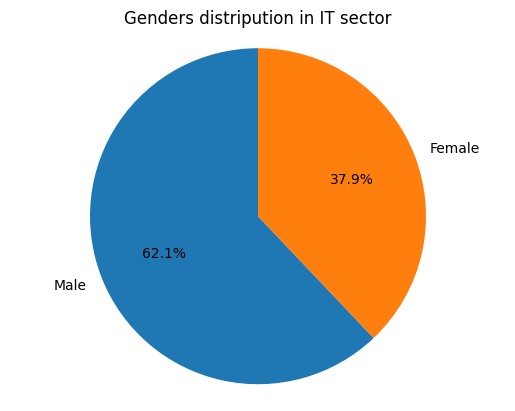

In [ ]:

# Pie chart of gender distripution in It sector
gendercount=dfIT['Gender'].value_counts()
print(gendercount)
labels = 'Male', 'Female'
plt.pie(gendercount, labels=labels,autopct='%1.1f%%',startangle=90)

plt.axis('equal') # Try commenting this out.
plt.title('Genders distripution in IT sector')
plt.show()

Gender
Female    435
Male      215
Name: count, dtype: int64


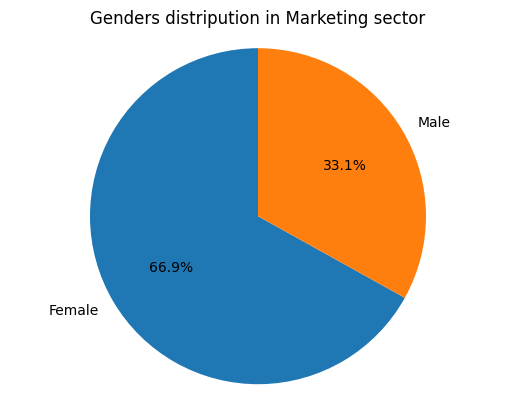

In [ ]:

# Pie chart of gender distripution in Marketing sector
gendercount=dfmkt['Gender'].value_counts()
print(gendercount)
labels = 'Female', 'Male'
plt.pie(gendercount, labels=labels,autopct='%1.1f%%',startangle=90)

plt.axis('equal') # Try commenting this out.
plt.title('Genders distripution in Marketing sector')
plt.show()

Gender
Female    91
Male      71
Name: count, dtype: int64


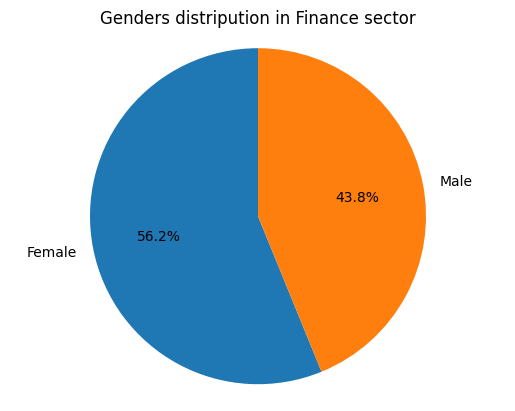

In [ ]:
# Pie chart of gender distripution in Finance sector
gendercount=dfFina['Gender'].value_counts()
print(gendercount)
labels = 'Female', 'Male'
plt.pie(gendercount, labels=labels,autopct='%1.1f%%',startangle=90)

plt.axis('equal') # Try commenting this out.
plt.title('Genders distripution in Finance sector')
plt.show()

### 4.7 Correlation between Years of experience and Salary.
 - Is there a correlation between years of experience and salary? Does having more years of experience result in a higher salary?

> In Finance Sector

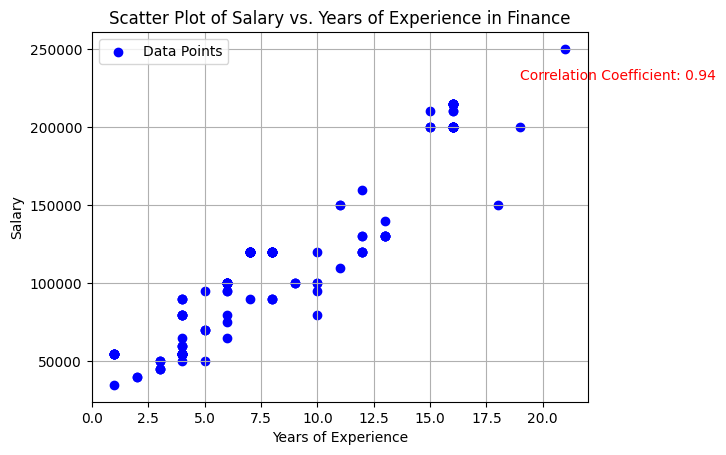

Correlation Coefficient: 0.9390818919548642


In [ ]:
 ##Extract Salary and Years of Experience columns
salary = dfFina['Salary']
yearsOfEx = dfFina['Years of Experience']

# Calculate correlation coefficient
correlation_coefficient = salary.corr(yearsOfEx)

# Create a scatter plot
plt.scatter(yearsOfEx, salary, color='blue', label='Data Points')

# Add labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Scatter Plot of Salary vs. Years of Experience in Finance')

# Display the correlation coefficient on the plot
plt.text(dfFina['Years of Experience'].max() - 2, dfFina['Salary'].max() - 20000, f'Correlation Coefficient: {correlation_coefficient:.2f}', color='red')

# Display the plot
plt.legend()
plt.grid(True)
plt.show()

print("Correlation Coefficient:", correlation_coefficient)

> In Marketing Sector

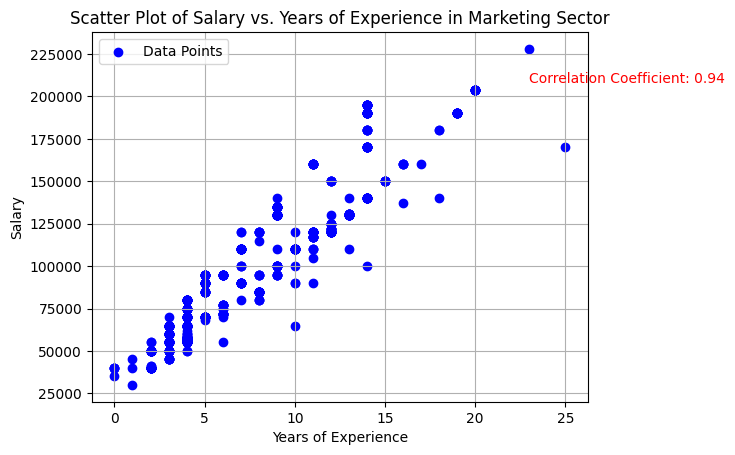

Correlation Coefficient: 0.9359305718267877


In [ ]:
 ##Extract Salary and Years of Experience columns
salary = dfmkt['Salary']
yearsOfEx = dfmkt['Years of Experience']

# Calculate correlation coefficient
correlation_coefficient = salary.corr(yearsOfEx)

# Create a scatter plot
plt.scatter(yearsOfEx, salary, color='blue', label='Data Points')

# Add labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Scatter Plot of Salary vs. Years of Experience in Marketing Sector')

# Display the correlation coefficient on the plot
plt.text(dfmkt['Years of Experience'].max() - 2, dfmkt['Salary'].max() - 20000, f'Correlation Coefficient: {correlation_coefficient:.2f}', color='red')

# Display the plot
plt.legend()
plt.grid(True)
plt.show()

print("Correlation Coefficient:", correlation_coefficient)

> In IT Sector

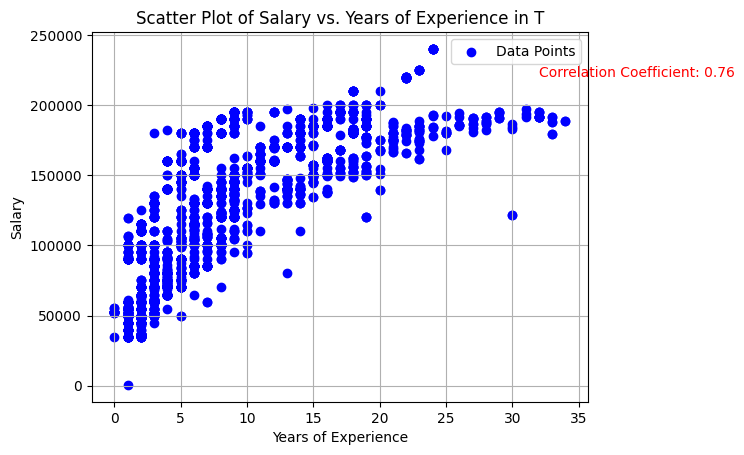

Correlation Coefficient: 0.7625326367122977


In [ ]:
##Extract Salary and Years of Experience columns
salary = dfIT['Salary']
yearsOfEx = dfIT['Years of Experience']

# Calculate correlation coefficient
correlation_coefficient = salary.corr(yearsOfEx)

# Create a scatter plot
plt.scatter(yearsOfEx, salary, color='blue', label='Data Points')

# Add labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Scatter Plot of Salary vs. Years of Experience in T')

# Display the correlation coefficient on the plot
plt.text(dfIT['Years of Experience'].max() - 2, dfIT['Salary'].max() - 20000, f'Correlation Coefficient: {correlation_coefficient:.2f}', color='red')

# Display the plot
plt.legend()
plt.grid(True)
plt.show()

print("Correlation Coefficient:", correlation_coefficient)

### 4.8 Correlation between Education and Salary.
  Is there a correlation between Education and Salary? Does having higher education result in a higher salary?

> In Finance Sector

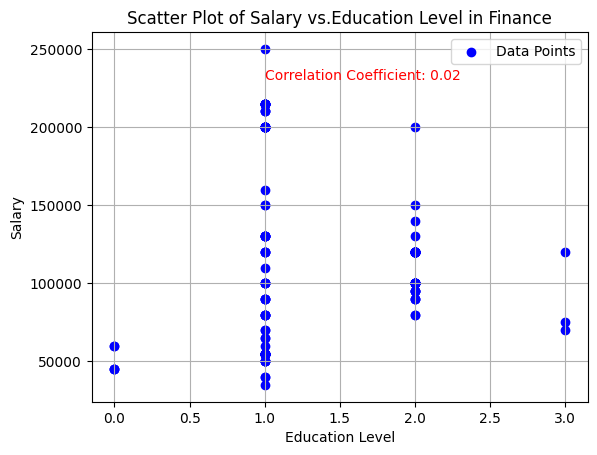

Correlation Coefficient: 0.0155409147795562


In [ ]:
# Extract Salary and Education Level columns
salary = dfFina['Salary']
education = dfFina['Education Level']
# Calculate correlation coefficient
correlation_coefficient = salary.corr(education)

# Create a scatter plot
plt.scatter(education, salary, color='blue', label='Data Points')

# Add labels and title
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.title('Scatter Plot of Salary vs.Education Level in Finance')

# Display the correlation coefficient on the plot
plt.text(dfFina['Education Level'].max() - 2, dfFina['Salary'].max() - 20000, f'Correlation Coefficient: {correlation_coefficient:.2f}', color='red')

# Display the plot
plt.legend()
plt.grid(True)
plt.show()
print("Correlation Coefficient:", correlation_coefficient)

> Marketing Sector

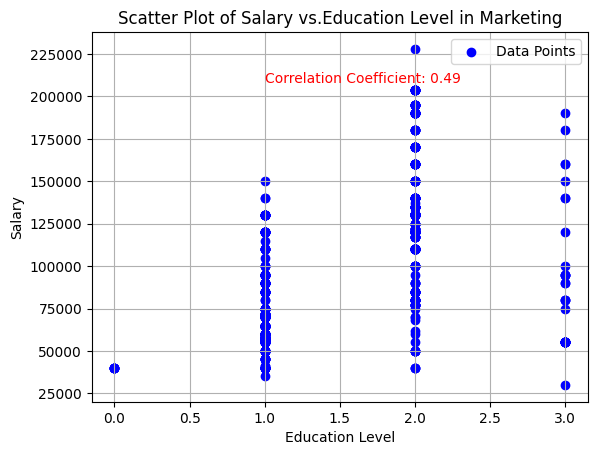

Correlation Coefficient: 0.49453057462571814


In [ ]:
# Extract Salary and Education Level columns
salary = dfmkt['Salary']
education = dfmkt['Education Level']
# Calculate correlation coefficient
correlation_coefficient = salary.corr(education)

# Create a scatter plot
plt.scatter(education, salary, color='blue', label='Data Points')

# Add labels and title
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.title('Scatter Plot of Salary vs.Education Level in Marketing')

# Display the correlation coefficient on the plot
plt.text(dfmkt['Education Level'].max() - 2, dfmkt['Salary'].max() - 20000, f'Correlation Coefficient: {correlation_coefficient:.2f}', color='red')

# Display the plot
plt.legend()
plt.grid(True)
plt.show()
print("Correlation Coefficient:", correlation_coefficient)

> IT Sector

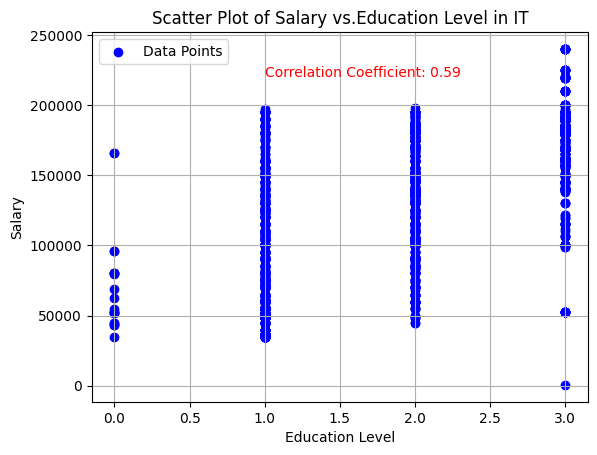

Correlation Coefficient: 0.5865695307214515


In [ ]:
# Extract Salary and Education Level columns
salary = dfIT['Salary']
education = dfIT['Education Level']
# Calculate correlation coefficient
correlation_coefficient = salary.corr(education)

# Create a scatter plot
plt.scatter(education, salary, color='blue', label='Data Points')

# Add labels and title
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.title('Scatter Plot of Salary vs.Education Level in IT')

# Display the correlation coefficient on the plot
plt.text(dfIT['Education Level'].max() - 2, dfIT['Salary'].max() - 20000, f'Correlation Coefficient: {correlation_coefficient:.2f}', color='red')

# Display the plot
plt.legend()
plt.grid(True)
plt.show()
print("Correlation Coefficient:", correlation_coefficient)

### 5.Conclusion
- IT Sector is still the field which have highest paid salary.
- Having more years of experience correlates with higher salaries in the Finance and Marketing sectors. This relationship can be attributed to the higher proportion of managerial positions in Marketing and Finance, which are 62% and 60%, respectively. These managerial positions tend to require longer years of experience compared to other roles.

- Meanwhile, the correlation between years of experience and salary in IT is weaker, at 0.76%. This can be explained by the fact that IT is a rapidly changing field that requires continuous updates of new knowledge. Therefore, it doesn't matter how much experience you have; what matters is how well you keep up with the knowledge.

- The level of education does not significantly impact salary in the three sectors, as the correlations are weak: 0.02 for Finance, 0.49 for Marketing, and 0.59 for IT. This suggests that whether one holds a high school diploma, a bachelor's degree, a master's degree, or a Ph.D. does not have a substantial effect on the salary. Salary variations may depend on other factors.

- Compatibility with Market Labor Average: We compared titles such as Software Engineer, Data Scientist, Marketing Manager, and Financial Manager with the survey data from the website www.glassdoor.com. We found that the average salary for these positions falls within the salary range reported on Glassdoor.